## Import libraries

In [1]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

## Read images

In [16]:
def clearList(data):
    data = data.split("|")
    cleaned = []
    for i in data:
        if len(i) != 0:
            cleaned.append(i)
    
    return cleaned

In [3]:
from os import listdir

def show(image):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)

folder_dir = "images/"
files = listdir(folder_dir)
img = cv2.imread(folder_dir + files[2])

In [4]:
def getThresh(img, mode=0):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.medianBlur(img,5)

    if mode == 1:
        return cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    elif mode == 2:
        return cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    else:
        return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [13]:
threshold_img = threshold_img[874:1958,565:1466]

## Teserract

In [5]:
import pytesseract
from pytesseract import image_to_string, image_to_data, Output

In [6]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
custom_config = r'--oem 3 --psm 6'

<IPython.core.display.Javascript object>


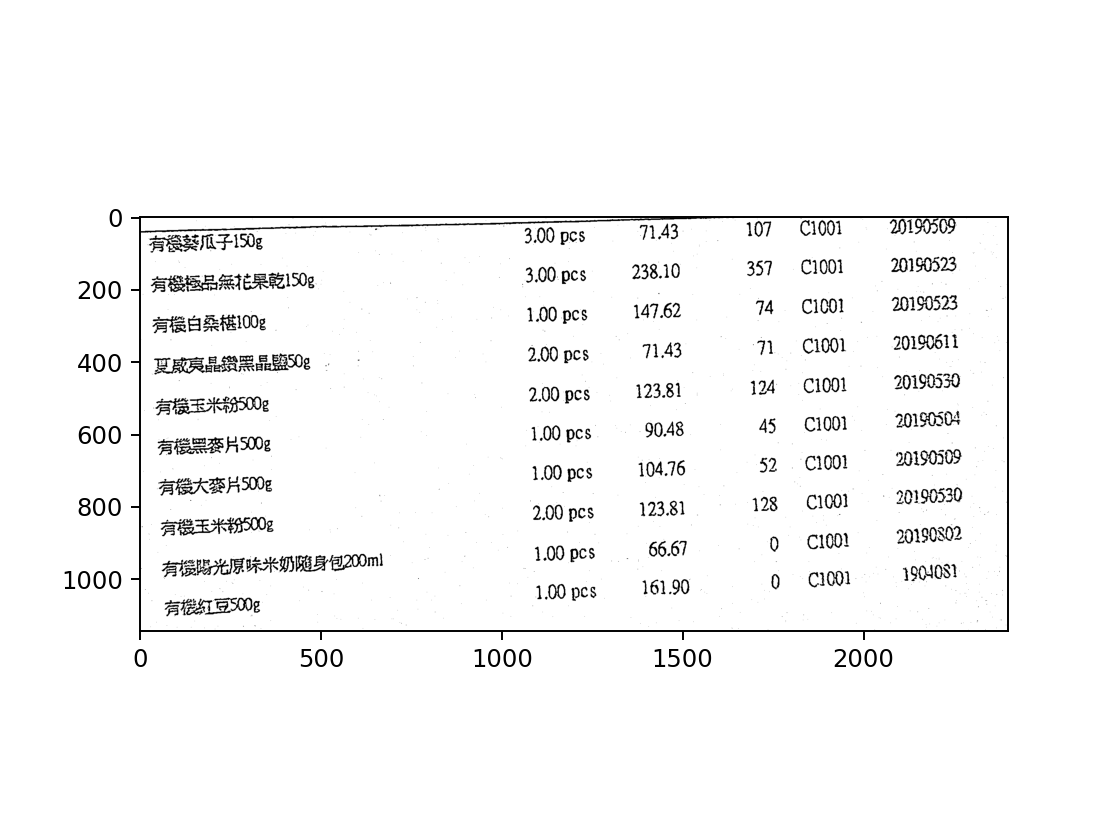

In [33]:
threshold_img = getThresh(img,1)
threshold_img = threshold_img[856:2000,600:3000]
show(threshold_img)

In [34]:
text = image_to_string(threshold_img, lang='chi_tra', config='--psm 4 --oem 3')
text = text.replace(" ","")
text = text.replace("\n","|")
text

'71.43107COO120190509||有徐鞭瓜子1508300pcs|有機極品無忙果乾1504300pces238.10357C100120190523|廓機白茲棋100g1.00pcs147.62放。Cl00120190523|瑟威畜晶鑽黑昌踢508.2.00pcs。。43生Cl00120190611|衣機玉米粉500g2.00pces123.81124。C100130190539|衣機黑雁片500E1.00pc90.4845。C100120190504|衣龜大容片500g1.00pcs。。104.7652。C1001320190509|、衣櫥玉米和500g200pes1238113280000和90|有有林陽光原味米奶隨身包200ml1.00pcs66.670Cl00120190802||衣枋紅豆500g1.00bcs161.交0COW119040S1|\x0c'

In [35]:
cleared = clearList(text)
cleared

['71.43107COO120190509',
 '有徐鞭瓜子1508300pcs',
 '有機極品無忙果乾1504300pces238.10357C100120190523',
 '廓機白茲棋100g1.00pcs147.62放。Cl00120190523',
 '瑟威畜晶鑽黑昌踢508.2.00pcs。。43生Cl00120190611',
 '衣機玉米粉500g2.00pces123.81124。C100130190539',
 '衣機黑雁片500E1.00pc90.4845。C100120190504',
 '衣龜大容片500g1.00pcs。。104.7652。C1001320190509',
 '、衣櫥玉米和500g200pes1238113280000和90',
 '有有林陽光原味米奶隨身包200ml1.00pcs66.670Cl00120190802',
 '衣枋紅豆500g1.00bcs161.交0COW119040S1',
 '\x0c']

In [37]:
import pandas as pd

df = pd.DataFrame(cleared[:-1])
df.to_excel("raw.xlsx") 